<a href="https://colab.research.google.com/github/Alwyndev/Final-Year-Project/blob/main/BraTs_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import os
import numpy as np
import random
import seaborn as sns
from PIL import Image, ImageEnhance
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [ ]:
# Directories for taining and testing
train_dir = '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Testing'
test_dir  = '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training'

train_paths = []
train_labels = []

for label in sorted(os.listdir(train_dir)):
    # print(label)
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# print(f"{train_paths},", end = "\n")

test_paths = []
test_labels = []

for label in sorted(os.listdir(test_dir)):
    # print(label)
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

print(f"{test_paths},", end = "\n")


['/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/pituitary/Tr-pi_1038.jpg', '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/pituitary/Tr-pi_1443.jpg', '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/pituitary/Tr-pi_0118.jpg', '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/pituitary/Tr-pi_1153.jpg', '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/pituitary/Tr-pi_0223.jpg', '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/pituitary/Tr-pi_1134.jpg', '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/notumor/Tr-noTr_0009.jpg', '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/meningioma/Tr-me_1228.jpg', '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/notumor/Tr-no_0310.jpg', '/content/drive/MyDrive/Colab Notebooks 2/BraTs Dataset Combined/Training/notumor/Tr-no_062

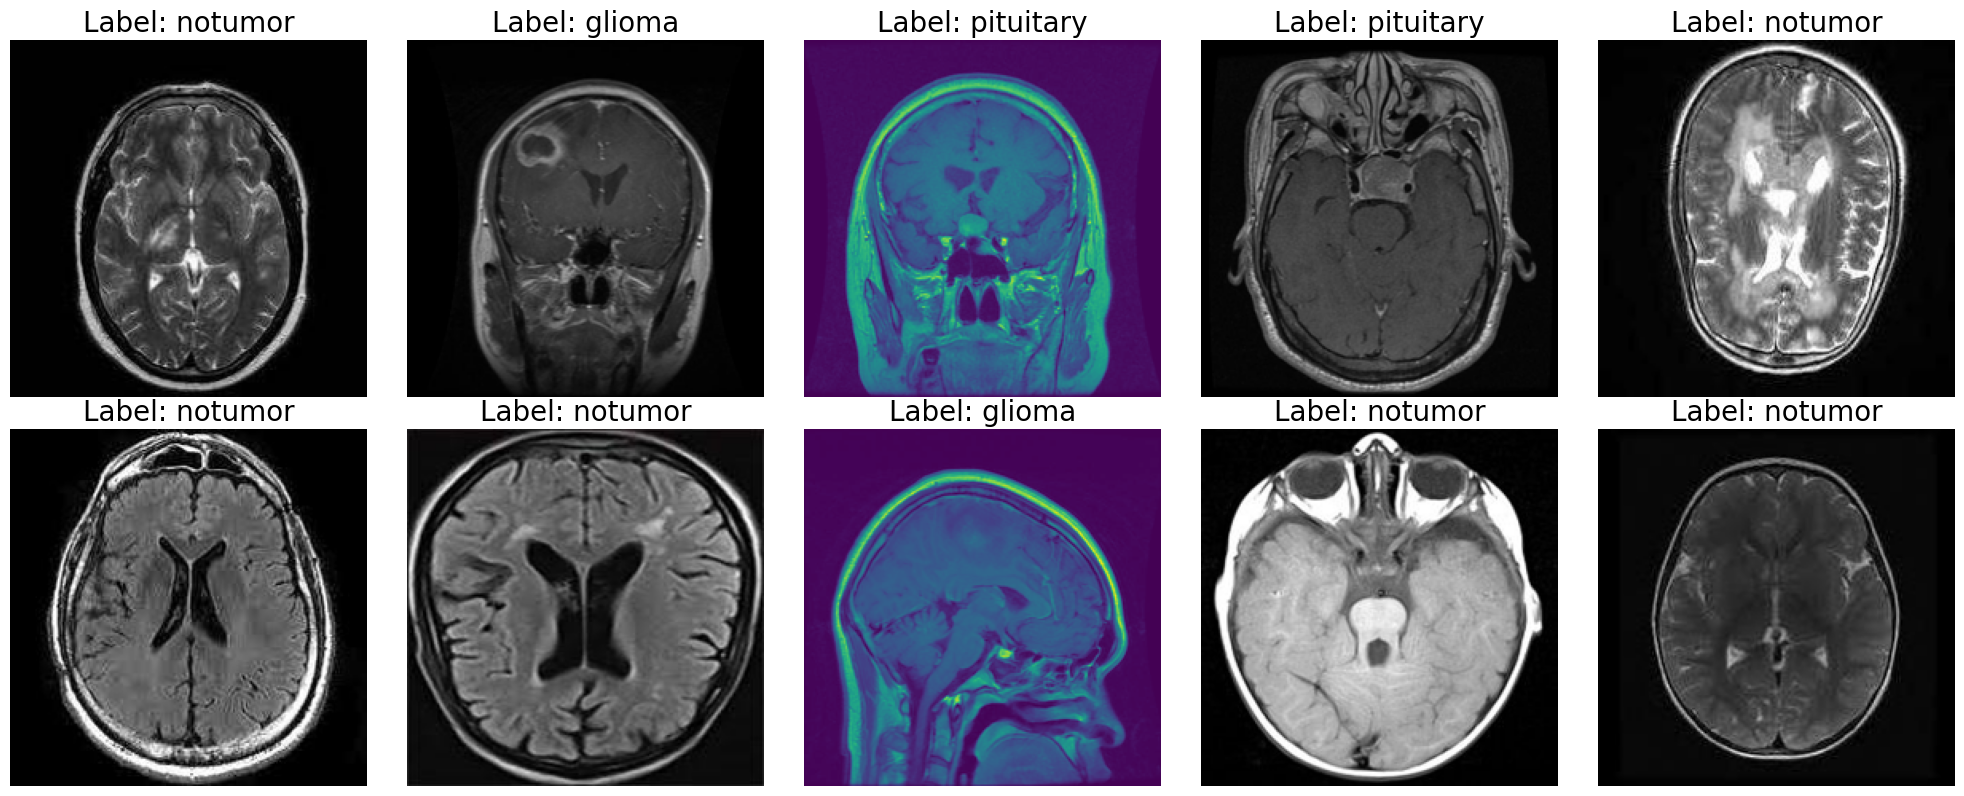

In [ ]:
# Select random indices for 10 images
random_indices = random.sample(range(len(train_paths)), 10)

# create figure to display the images
fig, axes = plt.subplots(2, 5, figsize = (20,8))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    img_path = train_paths[idx]
    img = Image.open(img_path)

    img = img.resize((224, 224))

    # display images
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Label: {train_labels[idx]}", fontsize = 20)

plt.tight_layout()
plt.show()


In [ ]:
# Image Pre processing

# Data Augmentation
def augment_image(image):
    image = Image.fromarray(np.uint8(image * 255))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Sharpness(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0

    return image

# Load image and apply augmentation
def open_images(paths):
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        arr = np.array(img) / 255.0
        img_aug = augment_image(arr)
        images.append(img_aug)

    return np.array(images)

# Encode labels
def encode_labels(labels):
    unique_labels = sorted(os.listdir(train_dir))
    label_to_index = {lab: idx for idx, lab in enumerate(unique_labels)}
    return [label_to_index[label] for label in labels]

# Data Generator for batching
def data_generator(paths, labels, batch_size=12, epochs=2, augment = True):
    n = len(paths)
    for _ in range(epochs):
        for i in range(0, n, batch_size):
            batch_paths = paths[i : i+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[i : i+batch_size]
            batch_labels = encode_labels(batch_labels)

            yield batch_images, np.array(batch_labels)

--- Training with Adam Optimizer ---
Epoch 1/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 496ms/step - loss: 1.3321 - sparse_categorical_accuracy: 0.4209
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 26s 416ms/step - loss: 0.7028 - sparse_categorical_accuracy: 0.7279
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 360ms/step - loss: 0.5012 - sparse_categorical_accuracy: 0.7972
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 375ms/step - loss: 0.2940 - sparse_categorical_accuracy: 0.8846
Epoch 5/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - loss: 0.2777 - sparse_categorical_accuracy: 0.8910
Epoch 6/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 375ms/step - loss: 0.2073 - sparse_categorical_accuracy: 0.9179
Epoch 7/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 370ms/step - loss: 0.1534 - sparse_categorical_accuracy: 0.9399
Epoch 8/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 365ms/step - loss: 0.0811 - sparse_categorical_accuracy: 0.9735
Epoch 9/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 379ms/step - loss: 0.0908 - sparse_categorical_accuracy: 0.9648
Epoch 10/

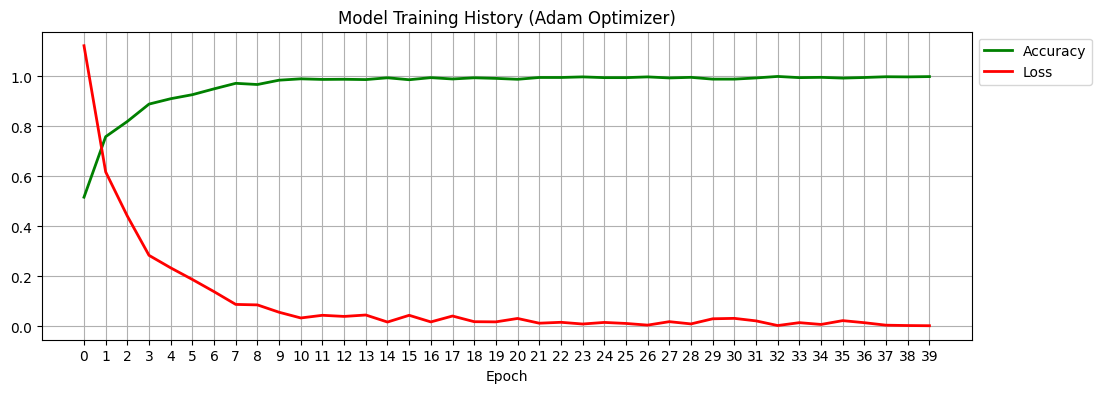


--- Evaluating Adam Model ---
269/269 ━━━━━━━━━━━━━━━━━━━━ 64s 238ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2147
           1       0.93      0.87      0.90      2161
           2       1.00      0.90      0.94      1990
           3       0.88      0.99      0.93      2284

    accuracy                           0.93      8582
   macro avg       0.94      0.93      0.93      8582
weighted avg       0.93      0.93      0.93      8582


--- Training with RMSprop Optimizer ---
Epoch 1/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - loss: 1.2929 - sparse_categorical_accuracy: 0.4654
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 372ms/step - loss: 0.7158 - sparse_categorical_accuracy: 0.7044
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 383ms/step - loss: 0.5346 - sparse_categorical_accuracy: 0.8103
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - loss: 0.3800 - sparse_categorical_accuracy: 0.8649
Ep

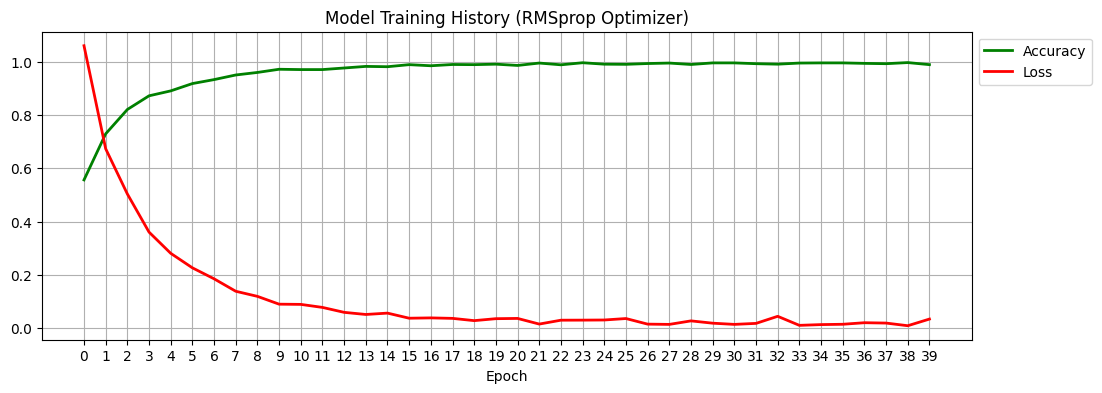


--- Evaluating RMSprop Model ---
269/269 ━━━━━━━━━━━━━━━━━━━━ 65s 239ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2147
           1       0.90      0.88      0.89      2161
           2       0.99      0.89      0.94      1990
           3       0.90      0.98      0.94      2284

    accuracy                           0.92      8582
   macro avg       0.93      0.92      0.92      8582
weighted avg       0.93      0.92      0.92      8582


--- Training with SGD Optimizer ---
Epoch 1/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 24s 390ms/step - loss: 1.5768 - sparse_categorical_accuracy: 0.2710
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 367ms/step - loss: 1.3570 - sparse_categorical_accuracy: 0.3726
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 383ms/step - loss: 1.2360 - sparse_categorical_accuracy: 0.4411
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 372ms/step - loss: 1.1414 - sparse_categorical_accuracy: 0.5317
Epo

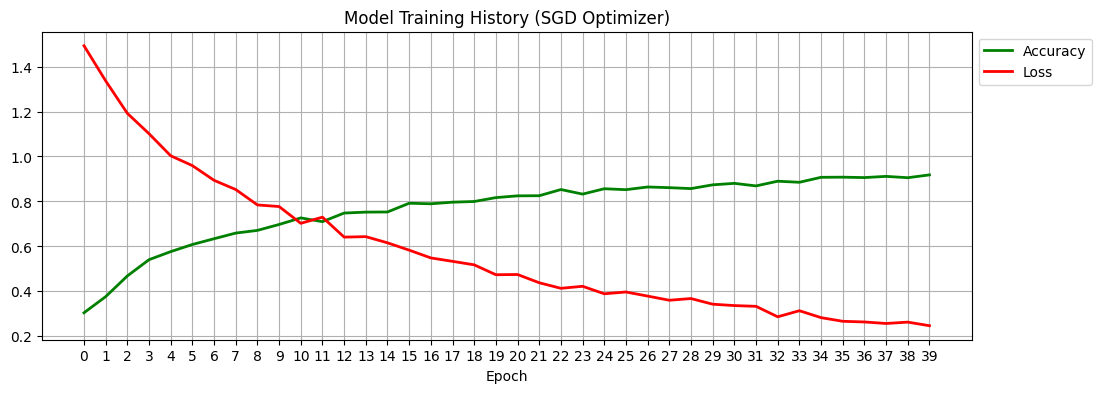


--- Evaluating SGD Model ---
269/269 ━━━━━━━━━━━━━━━━━━━━ 65s 240ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2147
           1       0.89      0.74      0.81      2161
           2       0.98      0.89      0.94      1990
           3       0.87      0.98      0.92      2284

    accuracy                           0.89      8582
   macro avg       0.90      0.89      0.89      8582
weighted avg       0.90      0.89      0.89      8582



In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
import numpy as np
import os
from PIL import Image, ImageEnhance
import random
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

# Re-define the base model and your custom layers
# (This is needed to start with a fresh set of weights for each optimizer test)
IMAGE_SIZE = 224
def build_model():
    base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                    include_top=False,
                    weights='imagenet'
                )

    # Freeze all layers of the base model initially
    for layer in base_model.layers:
        layer.trainable = False

    # Set only the last few layers (adjust as needed)
    for layer in base_model.layers[-10:-1]:
        layer.trainable = True

    model = Sequential()
    model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(base_model)
    model.add(Flatten())
    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))

    return model

# Image Pre processing and data generator functions (copied from your original code)
# Data Augmentation
def augment_image(image):
    image = Image.fromarray(np.uint8(image * 255))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Sharpness(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image) / 255.0
    return image

# Load image and apply augmentation
def open_images(paths, augment=True):
    images = []
    for path in paths:
        img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        arr = np.array(img) / 255.0
        if augment:
            img_aug = augment_image(arr)
            images.append(img_aug)
        else:
            images.append(arr)
    return np.array(images)

# Encode labels
def encode_labels(labels):
    unique_labels = sorted(os.listdir(train_dir))
    label_to_index = {lab: idx for idx, lab in enumerate(unique_labels)}
    return [label_to_index[label] for label in labels]

# Data Generator for batching
def data_generator(paths, labels, batch_size=12, epochs=2, augment = True):
    n = len(paths)
    for _ in range(epochs):
        # Shuffle paths and labels at the beginning of each epoch if augmenting
        if augment:
             paths, labels = shuffle(paths, labels)

        for i in range(0, n, batch_size):
            batch_paths = paths[i : i+batch_size]
            # Pass the augment flag to open_images
            batch_images = open_images(batch_paths, augment=augment)
            batch_labels = labels[i : i+batch_size]
            batch_labels = encode_labels(batch_labels)

            yield batch_images, np.array(batch_labels)

# Function to evaluate the model and print the classification report
def evaluate_model(model, test_paths, test_labels):
    test_labels_encoded = encode_labels(test_labels)

    # Build a clean test generator with augment=False and epochs=1
    batch_size_prediction = 32 # Use a consistent batch size for prediction
    test_gen = data_generator(
        test_paths, test_labels,
        batch_size=batch_size_prediction,
        epochs=1, # Predict only once over the dataset
        augment=False # No augmentation needed for prediction
    )

    # Calculate steps based on the number of test samples and the batch size
    steps_prediction = len(test_paths) // batch_size_prediction
    if len(test_paths) % batch_size_prediction != 0:
        steps_prediction += 1

    test_pred_probs = model.predict(test_gen, steps=steps_prediction, verbose=1)
    test_pred_classes = np.argmax(test_pred_probs, axis=1)

    print("Classification report:")
    # Ensure the lengths are consistent before calling classification_report
    if len(test_labels_encoded) == len(test_pred_classes):
        print(classification_report(test_labels_encoded, test_pred_classes))
    else:
        print(f"Error: Mismatch in the number of samples. True labels: {len(test_labels_encoded)}, Predicted labels: {len(test_pred_classes)}")


# Parameters for training
batch_size = 32
# Calculate steps per epoch based on the training data size and batch size
steps_per_epoch = len(train_paths) // batch_size
epochs = 40

# --- Test with Adam Optimizer ---
print("--- Training with Adam Optimizer ---")
model_adam = build_model()
model_adam.compile(
    optimizer=Adam(learning_rate=0.00003),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

# Create a new data generator for Adam training to ensure it starts from the beginning
train_gen_adam = data_generator(train_paths, train_labels, batch_size=batch_size, epochs=epochs, augment=True)

history_adam = model_adam.fit(
    train_gen_adam,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs
)

# Plot results for Adam
plt.figure(figsize=(12, 4))
plt.grid(True)
plt.plot(history_adam.history['sparse_categorical_accuracy'], "g-", linewidth=2)
plt.plot(history_adam.history['loss'], "r-", linewidth=2)
plt.title("Model Training History (Adam Optimizer)")
plt.xlabel("Epoch")
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Evaluate Adam model
print("\n--- Evaluating Adam Model ---")
evaluate_model(model_adam, test_paths, test_labels)


# --- Test with RMSprop Optimizer ---
print("\n--- Training with RMSprop Optimizer ---")
model_rmsprop = build_model() # Build a fresh model
model_rmsprop.compile(
    optimizer=RMSprop(learning_rate=0.00003),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

# Create a new data generator for RMSprop training
train_gen_rmsprop = data_generator(train_paths, train_labels, batch_size=batch_size, epochs=epochs, augment=True)

history_rmsprop = model_rmsprop.fit(
    train_gen_rmsprop,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs
)

# Plot results for RMSprop
plt.figure(figsize=(12, 4))
plt.grid(True)
plt.plot(history_rmsprop.history['sparse_categorical_accuracy'], "g-", linewidth=2)
plt.plot(history_rmsprop.history['loss'], "r-", linewidth=2)
plt.title("Model Training History (RMSprop Optimizer)")
plt.xlabel("Epoch")
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Evaluate RMSprop model
print("\n--- Evaluating RMSprop Model ---")
evaluate_model(model_rmsprop, test_paths, test_labels)


# --- Test with SGD Optimizer ---
print("\n--- Training with SGD Optimizer ---")
model_sgd = build_model() # Build a fresh model
model_sgd.compile(
    optimizer=SGD(learning_rate=0.00003, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

# Create a new data generator for SGD training
train_gen_sgd = data_generator(train_paths, train_labels, batch_size=batch_size, epochs=epochs, augment=True)

history_sgd = model_sgd.fit(
    train_gen_sgd,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs
)

# Plot results for SGD
plt.figure(figsize=(12, 4))
plt.grid(True)
plt.plot(history_sgd.history['sparse_categorical_accuracy'], "g-", linewidth=2)
plt.plot(history_sgd.history['loss'], "r-", linewidth=2)
plt.title("Model Training History (SGD Optimizer)")
plt.xlabel("Epoch")
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Evaluate SGD model
print("\n--- Evaluating SGD Model ---")
evaluate_model(model_sgd, test_paths, test_labels)


--- Confusion Matrix for Adam Model ---


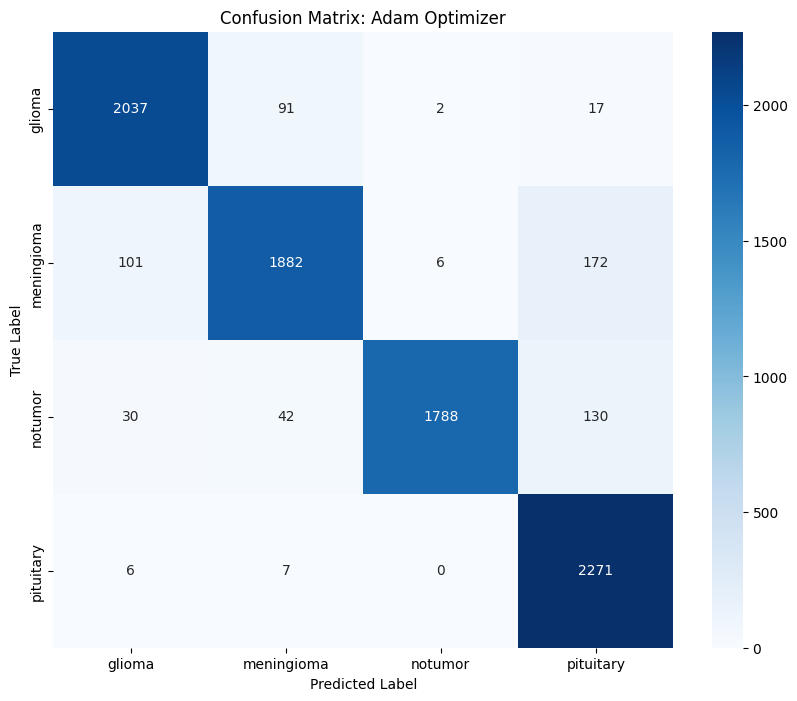


--- Confusion Matrix for RMSprop Model ---


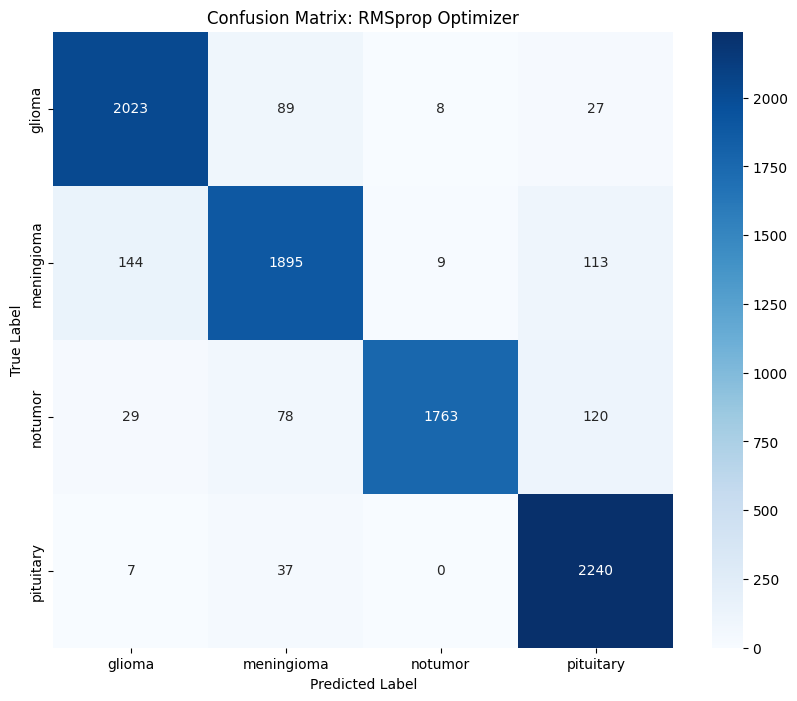


--- Confusion Matrix for SGD Model ---


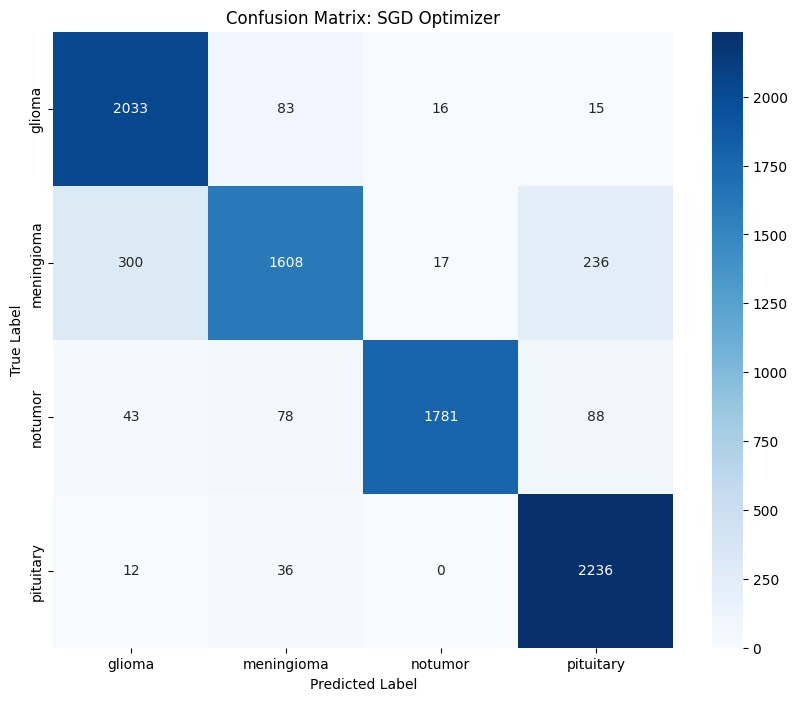

In [ ]:
# You also need test_labels_encoded which is derived from test_labels
test_labels_encoded = encode_labels(test_labels)

# Define the class labels for the confusion matrix plot
class_labels = sorted(os.listdir(test_dir)) # Assuming test_dir has the same class structure as train_dir

# Function to calculate and plot confusion matrix
def plot_confusion_matrix(model, test_paths, test_labels_encoded, title):
    """
    Calculates and plots the confusion matrix for a given model.

    Args:
        model: The trained Keras model.
        test_paths: List of paths to the test images.
        test_labels_encoded: List of encoded true labels for the test set.
        title: Title for the confusion matrix plot.
    """
    # Build a clean test generator with augment=False and epochs=1
    batch_size_prediction = 32 # Use the same batch size for prediction
    test_gen = data_generator(
        test_paths, test_labels,
        batch_size=batch_size_prediction,
        epochs=1,
        augment=False
    )

    # Calculate steps based on the number of test samples and the batch size
    steps_prediction = len(test_paths) // batch_size_prediction
    if len(test_paths) % batch_size_prediction != 0:
        steps_prediction += 1

    # Get predictions
    test_pred_probs = model.predict(test_gen, steps=steps_prediction, verbose=0) # Set verbose to 0 to avoid printing progress for each plot
    test_pred_classes = np.argmax(test_pred_probs, axis=1)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(test_labels_encoded, test_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix,
                annot=True, fmt='d',
                cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels
               )
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


# Plot confusion matrices for each model
print("\n--- Confusion Matrix for Adam Model ---")
plot_confusion_matrix(model_adam, test_paths, test_labels_encoded, "Adam Optimizer")

print("\n--- Confusion Matrix for RMSprop Model ---")
plot_confusion_matrix(model_rmsprop, test_paths, test_labels_encoded, "RMSprop Optimizer")

print("\n--- Confusion Matrix for SGD Model ---")
plot_confusion_matrix(model_sgd, test_paths, test_labels_encoded, "SGD Optimizer")


--- ROC Curve for Adam Model ---


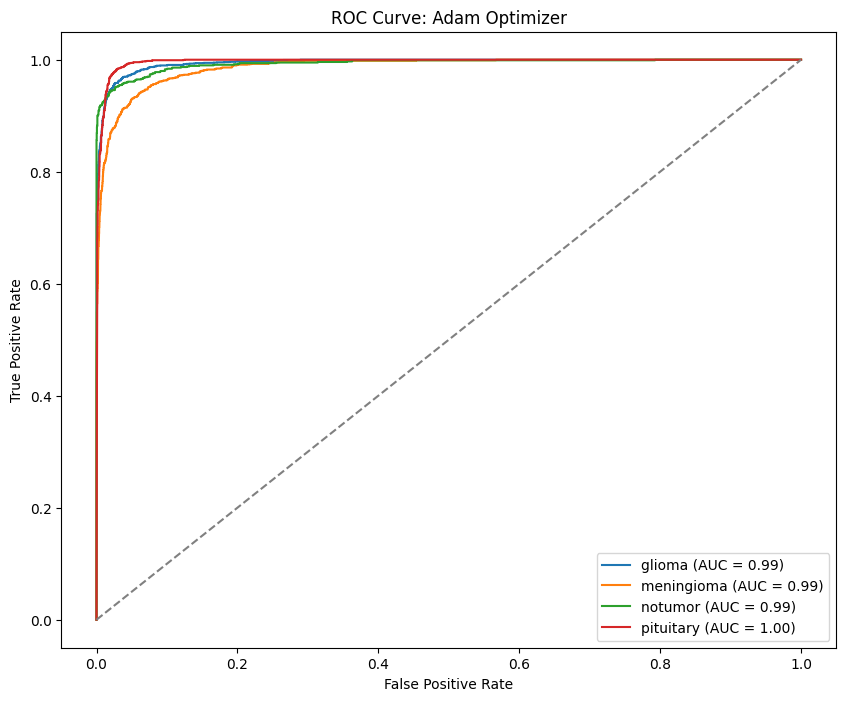


--- ROC Curve for RMSprop Model ---


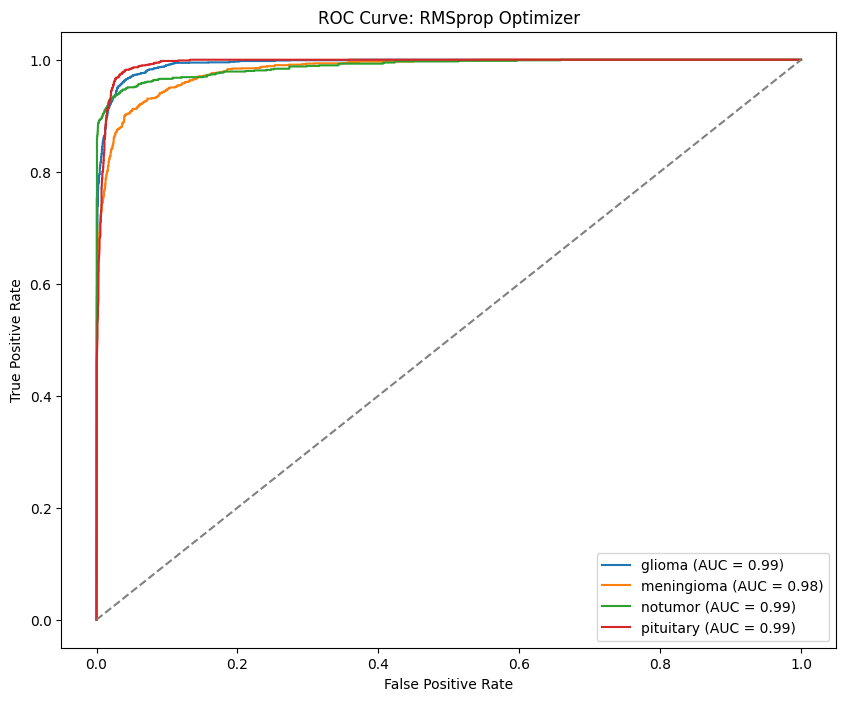


--- ROC Curve for SGD Model ---


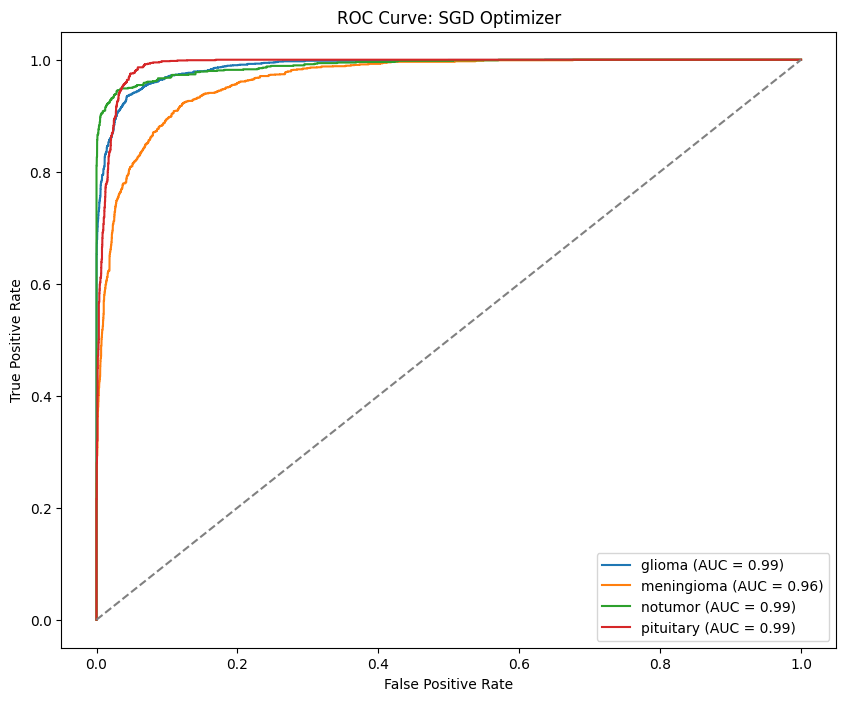

In [ ]:
# Ensure test_labels_encoded is defined
test_labels_encoded = encode_labels(test_labels)

# Define the class labels for the ROC curve plot
class_labels = sorted(os.listdir(test_dir)) # Assuming test_dir has the same class structure as train_dir

# Define unique_classes from the encoded test labels
unique_classes = np.unique(test_labels_encoded)

def plot_roc_curve(model, test_paths, test_labels_encoded, title):
    """
    Calculates and plots the ROC curve for a given model.

    Args:
        model: The trained Keras model.
        test_paths: List of paths to the test images.
        test_labels_encoded: List of encoded true labels for the test set.
        title: Title for the ROC curve plot.
    """
    # Build a clean test generator with augment=False and epochs=1
    batch_size_prediction = 32 # Use the same batch size for prediction
    test_gen = data_generator(
        test_paths, test_labels,
        batch_size=batch_size_prediction,
        epochs=1,
        augment=False
    )

    # Calculate steps based on the number of test samples and the batch size
    steps_prediction = len(test_paths) // batch_size_prediction
    if len(test_paths) % batch_size_prediction != 0:
        steps_prediction += 1

    # Get prediction probabilities
    test_pred_probs = model.predict(test_gen, steps=steps_prediction, verbose=0)

    # Binarize true labels
    test_labels_bin = label_binarize(test_labels_encoded, classes=unique_classes)

    # Compute ROC curve
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(len(unique_classes)):
        fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(10, 8))
    for i in range(len(unique_classes)):
        plt.plot(fpr[i], tpr[i], label=f"{class_labels[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curve: {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.show()


# Plot ROC curves for each model
print("\n--- ROC Curve for Adam Model ---")
plot_roc_curve(model_adam, test_paths, test_labels_encoded, "Adam Optimizer")

print("\n--- ROC Curve for RMSprop Model ---")
plot_roc_curve(model_rmsprop, test_paths, test_labels_encoded, "RMSprop Optimizer")

print("\n--- ROC Curve for SGD Model ---")
plot_roc_curve(model_sgd, test_paths, test_labels_encoded, "SGD Optimizer")

In [ ]:
# Save the models with optimizer names
print("\n--- Saving Models ---")
model_adam.save('VGG16_BraTS_model_Adam_40_10.keras', save_format = 'keras')
print("Adam model saved as 'VGG16_BraTS_model_Adam_40_10.keras'")

model_rmsprop.save('VGG16_BraTS_model_RMSprop_40_10.keras', save_format = 'keras')
print("RMSprop model saved as 'VGG16_BraTS_model_RMSprop_40_10.keras'")

model_sgd.save('VGG16_BraTS_model_SGD_40_10.keras', save_format = 'keras')
print("SGD model saved as 'VGG16_BraTS_model_SGD_40_10.keras'")


--- Saving Models ---


Adam model saved as 'VGG16_BraTS_model_Adam_40_10.keras'


RMSprop model saved as 'VGG16_BraTS_model_RMSprop_40_10.keras'
SGD model saved as 'VGG16_BraTS_model_SGD_40_10.keras'


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('VGG16_BraTS_model_2.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


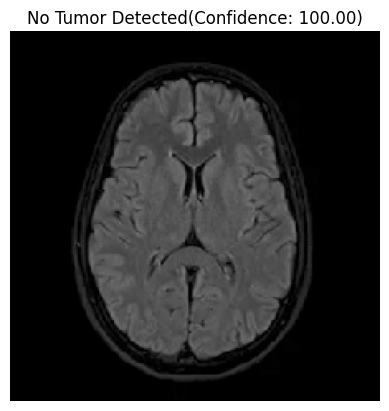

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def detect_and_display():
    try:
        # Define class labels
        class_labels = sorted(os.listdir(train_dir))

        # Load the image
        img = load_img('/content/drive/MyDrive/Colab Notebooks/Testing/notumor/Te-noTr_0002.jpg', target_size=(IMAGE_SIZE, IMAGE_SIZE))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Predictions
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        confidence_score = np.max(predictions, axis = 1)[0]

        # Determine the class label
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor Detected"
        else:
            result =  f"Predicted Class: {class_labels[predicted_class_index]}" # , Confidence: {confidence_score:.2f}

        # Display
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{result}(Confidence: {confidence_score * 100:.2f})")
        plt.show()

    except Exception as e:
        print(f"Error: {e}")
        return None

detect_and_display()